# Versuch 245 Induktion - Auswertung
#### Felix Fleischle - 21.2.2022

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
#1.2 Induktionsgesetz
# Messwerte

f_1 = np.array([3.1, 5.85, 9.36, 11.96, 15.06])
f_1_err = np.array([0.3, 0.03, 0.03, 0.05, 0.05])
u_1 = np.array([0.836, 2.60, 5.20, 7.20, 9.52]) / 2 #Spitze-Spitze
u_1_err = np.array([0.020, 0.04, 0.08, 0.08, 0.08]) / 2

#omega_1 = 2*np.pi*f_1
#omega_1_err = 2*np.pi*f_1_err

#print("Kreisfrequenzen:", omega_1, "+-", omega_1_err, "[1/s]")

i_2 = np.array([0.502, 0.998, 1.501, 1.995, 2.495, 3.010, 3.501, 4.000, 4.492])
i_2_err = np.array([0.003, 0.003, 0.003, 0.003, 0.004, 0.003, 0.004, 0.004, 0.008])

u_2 = np.array([0.808, 1.50, 2.22, 2.92, 3.62, 4.44, 5.12, 5.80, 6.48]) /2
u_2_err = np.array([0.008, 0.03, 0.04, 0.03, 0.08, 0.04, 0.04, 0.04, 0.08]) /2

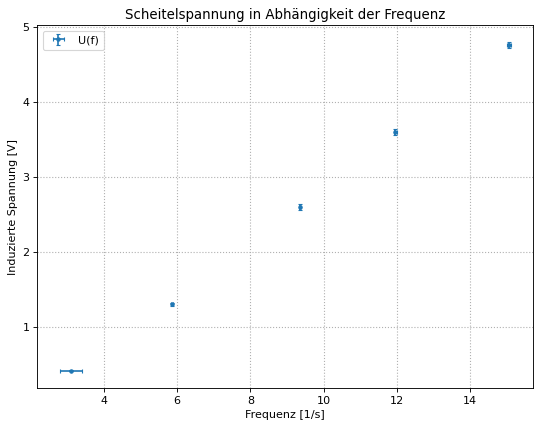

In [3]:
plt.figure(figsize=(8, 6), dpi=80)
plt.errorbar(f_1, u_1, label='U(f)', xerr=f_1_err, yerr=u_1_err, linestyle="none", marker = ".", capsize = 2)
plt.title('Scheitelspannung in Abhängigkeit der Frequenz')
plt.xlabel('Frequenz [1/s]')
plt.ylabel('Induzierte Spannung [V]')
plt.legend()
plt.grid(linestyle=":", linewidth=1)

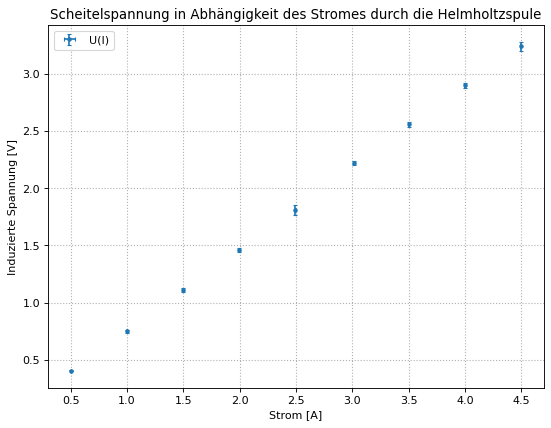

In [4]:
plt.figure(figsize=(8, 6), dpi=80)
plt.errorbar(i_2, u_2, label='U(I)', xerr=i_2_err, yerr=u_2_err, linestyle="none", marker = ".", capsize = 2)
plt.title('Scheitelspannung in Abhängigkeit des Stromes durch die Helmholtzspule')
plt.xlabel('Strom [A]')
plt.ylabel('Induzierte Spannung [V]')
plt.legend()
plt.grid(linestyle=":", linewidth=1)

In [5]:
def linear(x,a,b):
    return x*a + b

popt1, pcov1 = curve_fit(linear, f_1, u_1, sigma=u_1_err)

s1 = popt1[0]
s1_err = np.sqrt(pcov1[0,0])
print("Steigung U(f)", s1, "+-", s1_err, "[Vs]")

popt2, pcov2 = curve_fit(linear, i_2, u_2, sigma=u_2_err)

s2 = popt2[0]
s2_err = np.sqrt(pcov2[0,0])
print("Steigung U(I)", s2, "+-", s2_err, "[V/A]")

Steigung U(f) 0.35788487257480267 +- 0.007869249171111314 [Vs]
Steigung U(I) 0.7154056221460654 +- 0.002405090316805902 [V/A]


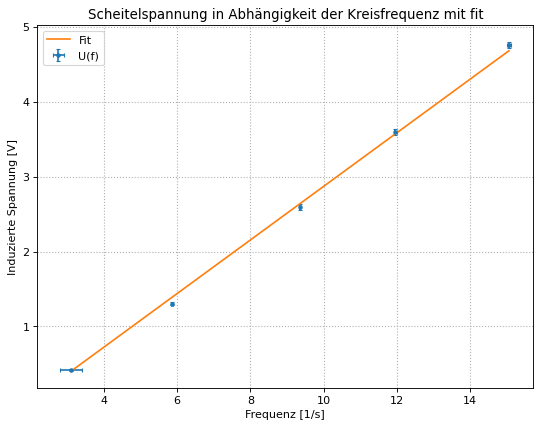

In [6]:
plt.figure(figsize=(8, 6), dpi=80)
plt.errorbar(f_1, u_1, label='U(f)', xerr=f_1_err, yerr=u_1_err, linestyle="none", marker = ".", capsize = 2)
plt.plot(f_1, linear(f_1, *popt1), label="Fit")
plt.title('Scheitelspannung in Abhängigkeit der Kreisfrequenz mit fit')
plt.xlabel('Frequenz [1/s]')
plt.ylabel('Induzierte Spannung [V]')
plt.legend()
plt.grid(linestyle=":", linewidth=1)

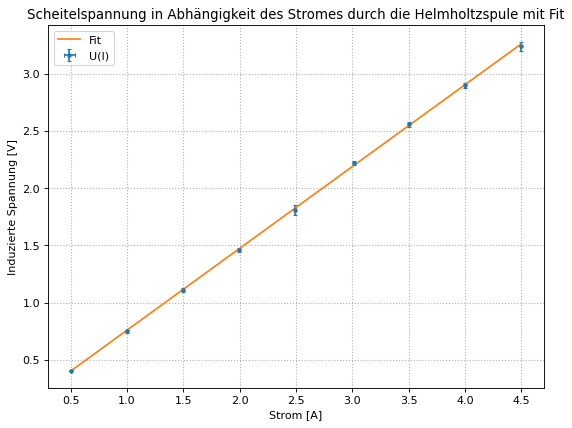

In [7]:
plt.figure(figsize=(8, 6), dpi=80)
plt.errorbar(i_2, u_2, label='U(I)', xerr=i_2_err, yerr=u_2_err, linestyle="none", marker = ".", capsize = 2)
plt.plot(i_2, linear(i_2, *popt2), label="Fit")
plt.title('Scheitelspannung in Abhängigkeit des Stromes durch die Helmholtzspule mit Fit')
plt.xlabel('Strom [A]')
plt.ylabel('Induzierte Spannung [V]')
plt.legend()
plt.grid(linestyle=":", linewidth=1)

In [8]:
# Berechne Magnetfeld
A = 41.7*(0.01)**2 #m^2
N = 4000 #2*124

B_1 = s1 / (2*np.pi*N*A)
B_1_err = s1_err / (2*np.pi*N*A)

print("Magnetfeld:", B_1, "+-", B_1_err, "[T]")

Magnetfeld: 0.0034148169381350685 +- 7.508572565972218e-05 [T]


In [9]:
# theoretische Feldstärke
i_1 = 4.0060
i_1_err = 0.0010
N_h = 124
R = 0.5 * 0.295 #m
mu_0 = 1.25663706212*10**(-6) #N/A^2
B_theo = 8/np.sqrt(125) * mu_0 * N_h * i_1 / R
B_theo_err = 8/np.sqrt(125) * mu_0 * N_h * i_1_err / R

print("Theoretische Feldstärke", B_theo, "+-", B_theo_err, "[T]")

Theoretische Feldstärke 0.0030282062714842794 +- 7.559176913340687e-07 [T]


In [10]:
sigma_B = ((B_1 - B_theo) / (np.sqrt(B_1_err**2 + B_theo_err**2)))
print("Abweichung B:", sigma_B)

Abweichung B: 5.148662715502503


In [11]:
# 3. Winkel
# Messwerte
winkel = np.array([0, 30, 60, 90, 120, 150, 180])
winkel_err = np.ones(7)

u_3 = np.array([1.54, 1.34, 0.82, 0.056, 0.776, 1.36, 1.52]) / 2
u_3_err = np.array([0.03, 0.03, 0.03, 0.006, 0.008, 0.03, 0.03]) / 2

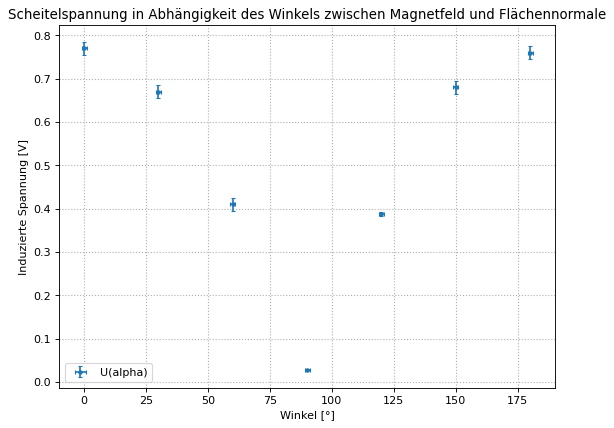

In [12]:
plt.figure(figsize=(8, 6), dpi=80)
plt.errorbar(winkel, u_3, label='U(alpha)', xerr=winkel_err, yerr=u_3_err, linestyle="none", marker = ".", capsize = 2)
plt.title('Scheitelspannung in Abhängigkeit des Winkels zwischen Magnetfeld und Flächennormale')
plt.xlabel('Winkel [°]')
plt.ylabel('Induzierte Spannung [V]')
plt.legend()
plt.grid(linestyle=":", linewidth=1)

In [13]:
# Frequenzvariation LETZTE 4 WERTE IGNORIERT!
f_4 = np.array([20.16, 39.58, 60.3, 80.1, 100.3, 120.7, 141.2, 160.5, 179.8, 202.4, 404, 602, 803, 1000, 1180]) #1412, 1585, 1815, 2016
f_4_err = np.array([0.29, 0.08, 0.6, 0.3, 0.3, 0.3, 0.8, 0.7, 0.9, 0.4, 4, 3, 5, 3, 8]) #8, 5, 5, 8

#omega_4 = 2*np.pi*f_4
#omega_4_err = 2*np.pi*f_4_err

#print("Kreisfrequenzen:", omega_4, "+-", omega_4_err, "[1/s]")

u_4 = np.array([1.86, 2.52, 2.76, 2.84, 2.84, 2.88, 2.88, 2.88, 2.92, 2.92, 2.96, 2.96, 2.96, 2.96, 2.96]) / 2 #2.96, 2.96, 3.04, 3.08
u_4_err = np.ones(len(u_4))*0.03 / 2

i_4 = np.array([0.4070, 0.2670, 0.1880, 0.1450, 0.1180, 0.0980, 0.0840, 0.0740, 0.0650, 0.0580, 0.0280, 0.0180, 0.0140, 0.0100, 0.0080]) #0.0050, 0.0050, 0.004, 0.0010
i_4_err = np.array([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010]) #0.003, 0.0020, 0.003, 0.0020

u_h = np.array([4.16, 4.32, 4.32, 4.36, 4.32, 4.32, 4.32, 4.32, 4.32, 4.32, 4.36, 4.36, 4.32, 4.32, 4.32]) / 2 #4.32, 4.32, 4.32, 4.32
u_h_err = np.ones(len(u_h))*0.04 / 2

print(len(u_h))

15


In [14]:
relu = u_4 / u_h
relu_err = np.sqrt((u_4_err/u_4)**2 + (u_h_err/u_h)**2)*relu

resistance = u_h / i_4
resistance_err = np.sqrt((u_h_err/u_h)**2 + (i_4_err/i_4)**2)*resistance

print("Verhältnis von Induzierter zu Angelegter Spannung:", relu, "+-", relu_err)

print("Widerstand in der Helmholtzspule:", resistance, "+-", resistance_err, "[Ohm]")

Verhältnis von Induzierter zu Angelegter Spannung: [0.44711538 0.58333333 0.63888889 0.65137615 0.65740741 0.66666667
 0.66666667 0.66666667 0.67592593 0.67592593 0.67889908 0.67889908
 0.68518519 0.68518519 0.68518519] +- [0.00839579 0.00879765 0.0091225  0.00911352 0.00923462 0.00929135
 0.00929135 0.00929135 0.00934853 0.00934853 0.00928105 0.00928105
 0.00940614 0.00940614 0.00940614]
Widerstand in der Helmholtzspule: [  5.11056511   8.08988764  11.4893617   15.03448276  18.30508475
  22.04081633  25.71428571  29.18918919  33.23076923  37.24137931
  77.85714286 121.11111111 154.28571429 216.         270.        ] +- [ 0.05071897  0.08080226  0.12268746  0.17255659  0.22976515  0.30369747
  0.38781477  0.47815859  0.59669385  0.72882725  2.87088985  6.8195211
 11.11261501 21.69239498 33.84246593] [Ohm]


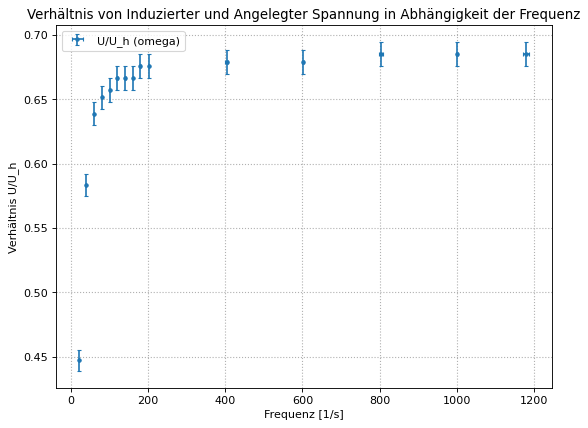

In [15]:
plt.figure(figsize=(8, 6), dpi=80)
plt.errorbar(f_4, relu, label='U/U_h (omega)', xerr=f_4_err, yerr=relu_err, linestyle="none", marker = ".", capsize = 2)
plt.title('Verhältnis von Induzierter und Angelegter Spannung in Abhängigkeit der Frequenz')
plt.xlabel('Frequenz [1/s]')
plt.ylabel('Verhältnis U/U_h')
plt.legend()
plt.grid(linestyle=":", linewidth=1)

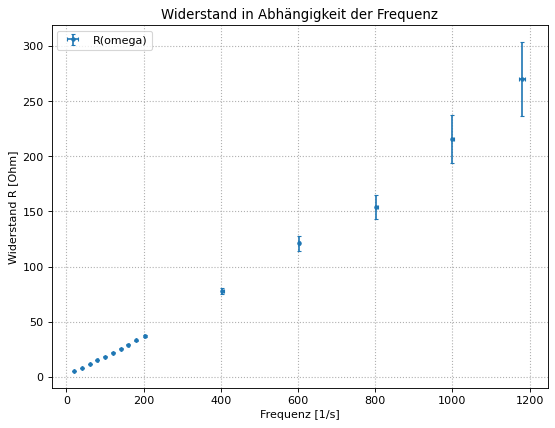

In [16]:
plt.figure(figsize=(8, 6), dpi=80)
plt.errorbar(f_4, resistance, label='R(omega)', xerr=f_4_err, yerr=resistance_err, linestyle="none", marker = ".", capsize = 2)
plt.title('Widerstand in Abhängigkeit der Frequenz')
plt.xlabel('Frequenz [1/s]')
plt.ylabel('Widerstand R [Ohm]')
plt.legend()
plt.grid(linestyle=":", linewidth=1)

Steigung: 0.16992605773295144 +- 0.002506017698128986 [Ohm s]


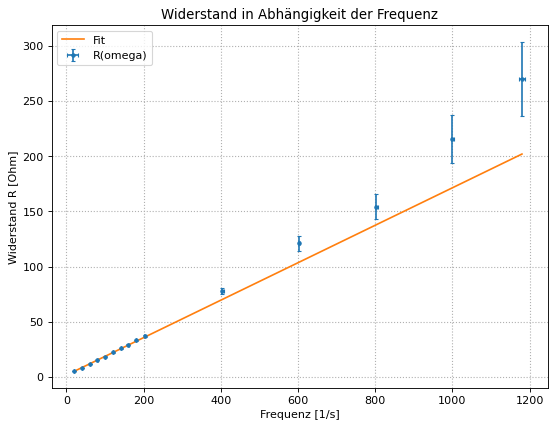

In [17]:
# Bestimmung Induktivität
popt3, pcov3 = curve_fit(linear, f_4, resistance, sigma=resistance_err)

s4 = popt3[0]
s4_err = np.sqrt(pcov3[0,0])
print("Steigung:", s4, "+-", s4_err, "[Ohm s]")

plt.figure(figsize=(8, 6), dpi=80)
plt.errorbar(f_4, resistance, label='R(omega)', xerr=f_4_err, yerr=resistance_err, linestyle="none", marker = ".", capsize = 2)
plt.plot(f_4, linear(f_4, *popt3), label="Fit")
plt.title('Widerstand in Abhängigkeit der Frequenz')
plt.xlabel('Frequenz [1/s]')
plt.ylabel('Widerstand R [Ohm]')
plt.legend()
plt.grid(linestyle=":", linewidth=1)

In [18]:
L = s4 / (2*np.pi)
L_err = s4_err / (2*np.pi)

print("Induktivität:", L, "+-", L_err, "[H]")

Induktivität: 0.02704457204831801 +- 0.00039884510413300137 [H]


In [19]:
# 3. Erdmagnetfeld
u_e = 0.196 / 2
u_e_err = 0.003 / 2

f_e = 16.3
f_e_err = 0.3

#omega_e = 2*np.pi*f_e
#omega_e_err = 2*np.pi*f_e_err

B_e = u_e /(2*np.pi*A*N*f_e)
B_e_err = np.sqrt((u_e_err/u_e)**2 + (f_e_err/f_e)**2)*B_e

print("Erdmagnetfeld:", B_e, "+-", B_e_err, "[T]")

Erdmagnetfeld: 5.736705515221839e-05 +- 1.3732407970560665e-06 [T]


In [23]:
# Horizontalkomponente:
u_ho = 0.082 / 2
u_ho_err = 0.002 / 2

B_ho = u_ho /(2*np.pi*A*N*f_e)
B_ho_err = np.sqrt((u_ho_err/u_ho)**2 + (f_e_err/f_e)**2)*B_ho

print("Erdmagnetfeld Horizontalkomponente:", B_ho, "+-", B_ho_err, "[T]")

# Vertikalkomponente
i_v = 0.0470
i_v_err = 0.0010
B_v = 8/np.sqrt(125) * mu_0 * N_h * i_v / R
B_v_err = 8/np.sqrt(125) * mu_0 * N_h * i_v_err / R 

print("Vertikalkomponente:", B_v, "+-", B_v_err, "[T]")

# Inklinationswinkel:
cosa = B_ho / B_e
#cosa_err = np.sqrt((B_e_err/B_e)**2 + (B_ho_err/B_ho)**2)*cosa

alpha = np.arccos(cosa) *(180/np.pi)
#alpha_err = np.arccos(cosa_err) *(180/np.pi)
alpha_err = np.sqrt( (-1/(np.sqrt(1-cosa**2)) * (B_ho_err / B_e))**2 + (-1/(np.sqrt(1-cosa**2)) *(B_ho*B_e_err / B_e**2))**2 ) *(180/np.pi)

print("Inklinationswinkel:", alpha, "+-", alpha_err, "[°]")

Erdmagnetfeld Horizontalkomponente: 2.400050266572402e-05 +- 7.333418824581703e-07 [T]
Vertikalkomponente: 3.552813149270123e-05 +- 7.559176913340687e-07 [T]
Inklinationswinkel: 65.26844588490013 +- 1.0243934451045786 [°]


In [22]:
alpha_lit = 66
sigma_alpha = (alpha_lit - alpha)/(alpha_err)

print("Abweichung Inklinationswinkel:", sigma_alpha)

Abweichung Inklinationswinkel: 0.7141339283220278
